# Simulando sua primeira série temporal!

Modelo: 
    
    
$Y_t = 1 +   0.9Y_{(t-1)} + \epsilon$ 


$\epsilon \sim N(1,1)$


In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [96]:
def epsilon(mean, sigma):
    return np.random.normal(mean, sigma, 1)

In [161]:
def time_series_generation(e_mean, e_sigma, mean=4, sigma=0.2, samples=100):
    Y = [None]*samples
    Y[0] =  np.random.normal(mean, sigma, 1)[0]
    for t in range(0, samples-1):
        Y[t+1] = 1 + 0.9*Y[t] + epsilon(e_mean, e_sigma)[0]
    return Y

In [162]:
Y = time_series_generation(e_mean = 1, e_sigma = 1)

In [163]:
series = pd.DataFrame({"y": Y, "date": np.array([datetime.datetime(2013+i, 9, 28) for i in range(100)])})

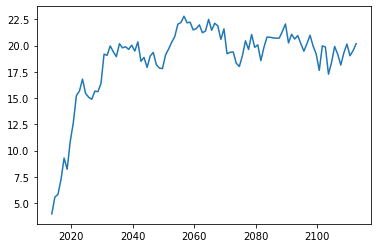

In [164]:
plt.plot(series.date,series.y)

# AR, MA e ARMA

# Ajustando o modelo AR

In [25]:
!pip install statsmodels --upgrade

Requirement already up-to-date: statsmodels in /Users/dimassoares/opt/anaconda3/envs/mentorama/lib/python3.7/site-packages (0.12.1)


In [15]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
data = sm.datasets.sunspots.load_pandas().data['SUNACTIVITY']

<AxesSubplot:>

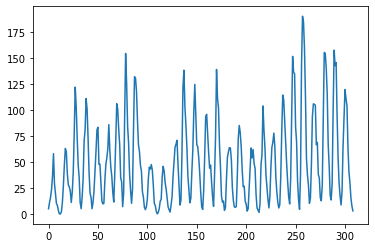

In [17]:
data.plot()

In [36]:
def AR_model_generation(ts, p):
    model = ARIMA(ts, order = [p, 0, 0])
    model_fit = model.fit()
    return model_fit

In [37]:
AR_1 = AR_model_generation(data, 1)
AR_2 =  AR_model_generation(data, 2)

In [38]:
AR_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1406.585
Date:                Sat, 21 Nov 2020   AIC                           2819.169
Time:                        18:59:47   BIC                           2830.369
Sample:                             0   HQIC                          2823.647
                                - 309                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.3963      9.949      4.865      0.000      28.897      67.895
ar.L1          0.8244      0.036     23.011      0.000       0.754       0.895
sigma2       524.5565     39.103     13.415      0.000     447.916     601.197
===================================================================================
Ljung-Box (L1) (Q):                 100.01   Jarque-Bera (JB):               135.37
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.81   Skew:                             1.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [97]:
# KDE: Kernel Density estimation

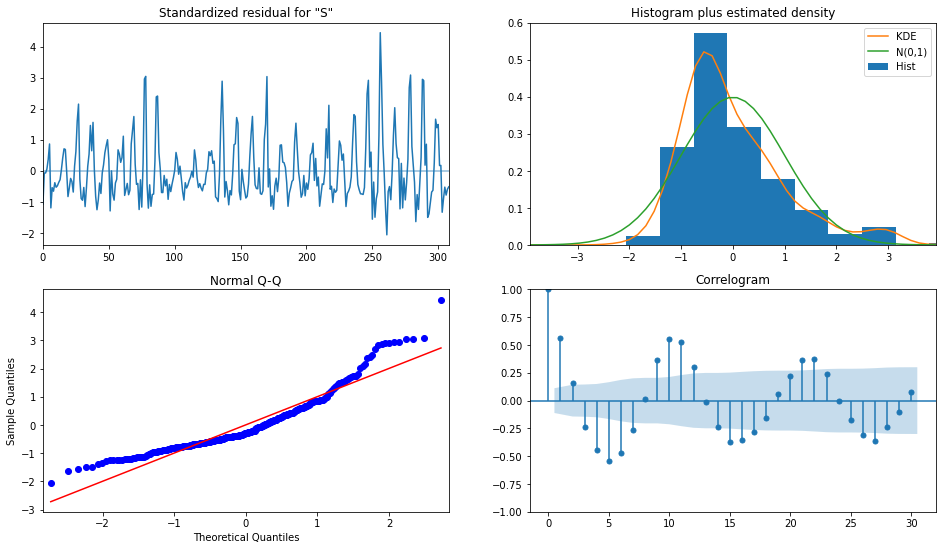

In [39]:
fig = plt.figure(figsize=(16,9))
fig = AR_1.plot_diagnostics(fig=fig, lags=30)

# AR(2)

In [40]:
AR_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1307.319
Date:                Sat, 21 Nov 2020   AIC                           2622.637
Time:                        19:00:00   BIC                           2637.570
Sample:                             0   HQIC                          2628.607
                                - 309                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.7462      3.938     12.631      0.000      42.027      57.465
ar.L1          1.3906      0.037     37.694      0.000       1.318       1.463
ar.L2         -0.6886      0.036    -19.363      0.000      -0.758      -0.619
sigma2       274.7272     18.897     14.538      0.000     237.689     311.765
===================================================================================
Ljung-Box (L1) (Q):                   2.40   Jarque-Bera (JB):                80.38
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):               1.65   Skew:                             0.83
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

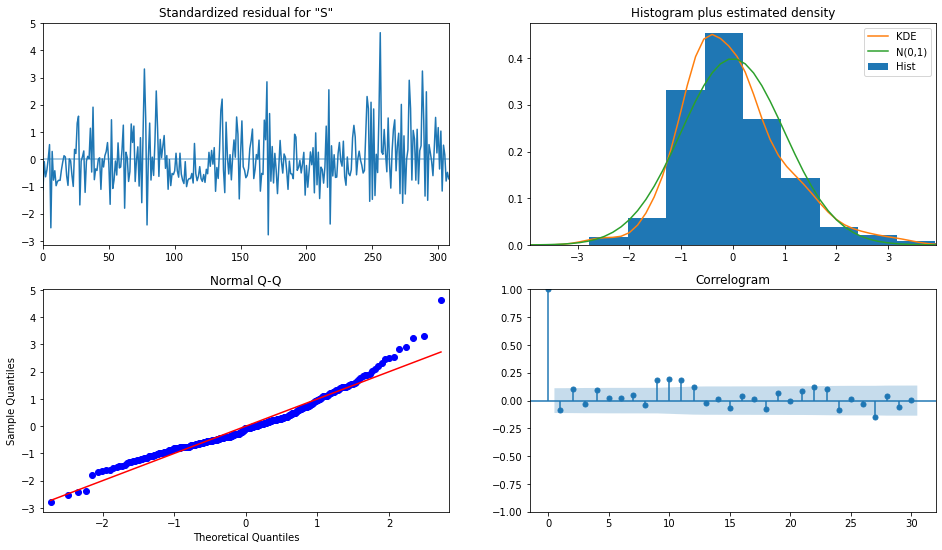

In [41]:
fig_2 = plt.figure(figsize=(16,9))
fig_final = AR_2.plot_diagnostics(fig=fig_2, lags=30)

# Moving Average Model

In [50]:
def MA_model_generation(ts, q):
    model = ARIMA(ts, order = [0, 0, q])
    model_fit = model.fit()
    return model_fit

In [51]:
MA_1 = MA_model_generation(data, 1)
MA_2 = MA_model_generation(data, 2)

/Users/dimassoares/opt/anaconda3/envs/mentorama/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [44]:
MA_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1440.450
Date:                Sat, 21 Nov 2020   AIC                           2886.901
Time:                        19:02:11   BIC                           2898.101
Sample:                             0   HQIC                          2891.378
                                - 309                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.6028      3.281     15.118      0.000      43.172      56.034
ma.L1          0.8134      0.028     28.719      0.000       0.758       0.869
sigma2       653.2738     58.358     11.194      0.000     538.895     767.653
===================================================================================
Ljung-Box (L1) (Q):                  82.26   Jarque-Bera (JB):                39.47
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.05   Skew:                             0.86
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
MA_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -1358.404
Date:                Sat, 21 Nov 2020   AIC                           2724.809
Time:                        19:02:35   BIC                           2739.742
Sample:                             0   HQIC                          2730.779
                                - 309                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.5110      4.038     12.260      0.000      41.596      57.426
ma.L1          1.1879      0.041     28.649      0.000       1.107       1.269
ma.L2          0.6846      0.041     16.861      0.000       0.605       0.764
sigma2       383.0131     29.973     12.778      0.000     324.266     441.760
===================================================================================
Ljung-Box (L1) (Q):                  18.89   Jarque-Bera (JB):                69.47
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.84   Skew:                             1.00
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

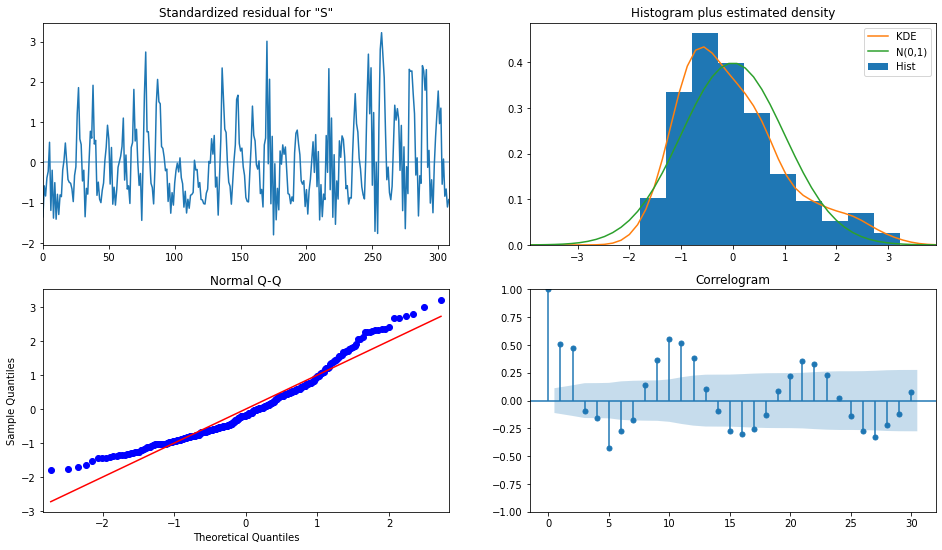

In [48]:
fig_1 = plt.figure(figsize=(16,9))
fig_1 = MA_1.plot_diagnostics(fig=fig_1, lags=30)

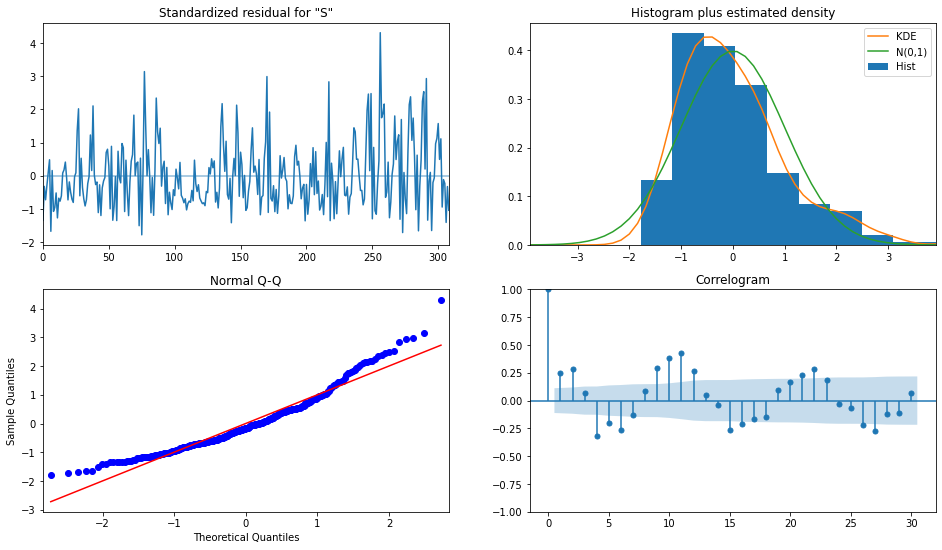

In [49]:
fig_2 = plt.figure(figsize=(16,9))
fig_2 = MA_2.plot_diagnostics(fig=fig_2, lags=30)

# ARMA model

In [52]:
def ARMA_model_generation(ts, p, q):
    model = ARIMA(ts, order = [p, 0, q])
    model_fit = model.fit()
    return model_fit

In [53]:
ARMA_1_1 = ARMA_model_generation(data, 1, 1)
ARMA_2_2 = ARMA_model_generation(data, 2, 2)

In [54]:
ARMA_1_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1352.613
Date:                Sat, 21 Nov 2020   AIC                           2713.226
Time:                        19:05:45   BIC                           2728.160
Sample:                             0   HQIC                          2719.197
                                - 309                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.7921      8.077      6.041      0.000      32.962      64.623
ar.L1          0.7355      0.046     15.921      0.000       0.645       0.826
ma.L1          0.5194      0.048     10.798      0.000       0.425       0.614
sigma2       369.1788     25.783     14.319      0.000     318.646     419.712
===================================================================================
Ljung-Box (L1) (Q):                   9.89   Jarque-Bera (JB):                73.24
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.93   Skew:                             0.89
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [56]:
ARMA_2_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1304.436
Date:                Sat, 21 Nov 2020   AIC                           2620.873
Time:                        19:06:04   BIC                           2643.273
Sample:                             0   HQIC                          2629.828
                                - 309                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.7502      3.667     13.567      0.000      42.563      56.938
ar.L1          1.4460      0.077     18.755      0.000       1.295       1.597
ar.L2         -0.7458      0.064    -11.681      0.000      -0.871      -0.621
ma.L1         -0.1405      0.097     -1.447      0.148      -0.331       0.050
ma.L2          0.0691      0.079      0.874      0.382      -0.086       0.224
sigma2       269.5971     18.567     14.520      0.000     233.207     305.988
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               102.49
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.53   Skew:                             0.91
Prob(H) (two-sided):                  0.03   Kurtosis:                         5.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

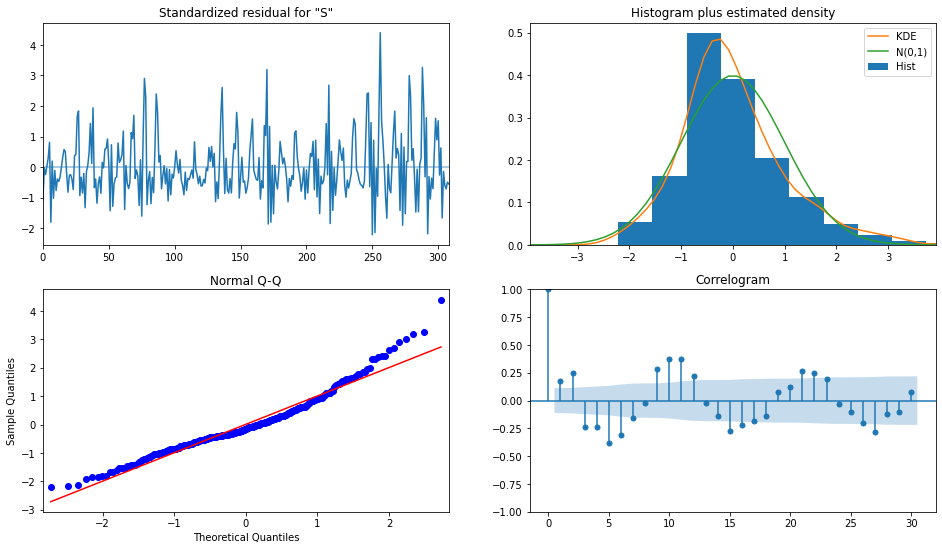

In [57]:
fig = plt.figure(figsize=(16,9))
fig = ARMA_1_1.plot_diagnostics(fig=fig, lags=30)

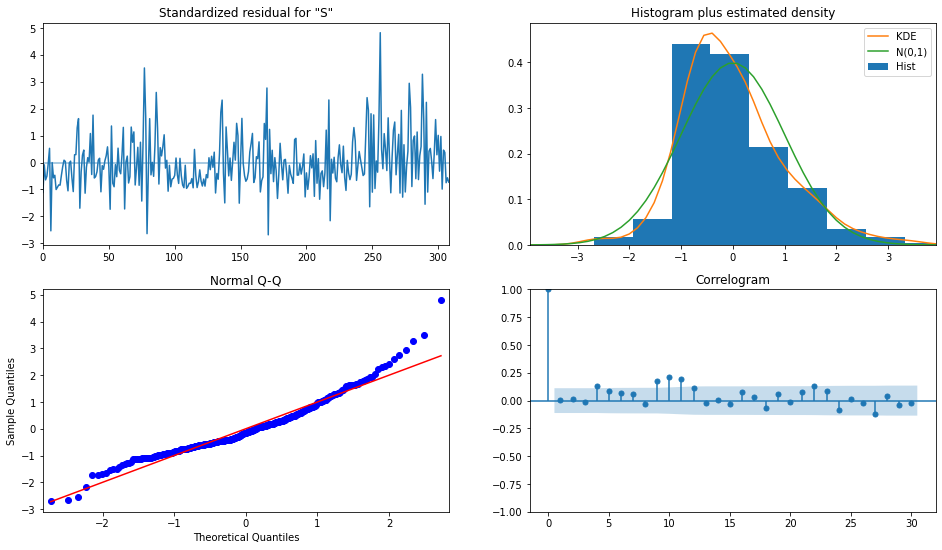

In [58]:
fig = plt.figure(figsize=(16,9))
fig = ARMA_2_2.plot_diagnostics(fig=fig, lags=30)

# Prophet: Forecasting at Scale

In [2]:
import pandas as pd
from fbprophet import Prophet

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/monthly-milk-production-pounds.csv")

In [109]:
data = data.rename(columns = {"Month": "ds", 'Monthly milk production (pounds per cow)': "y"})

<AxesSubplot:>

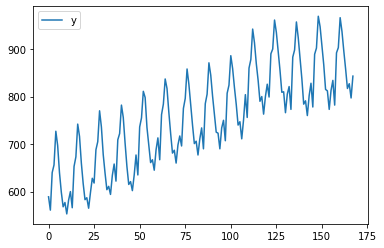

In [111]:
data.plot()

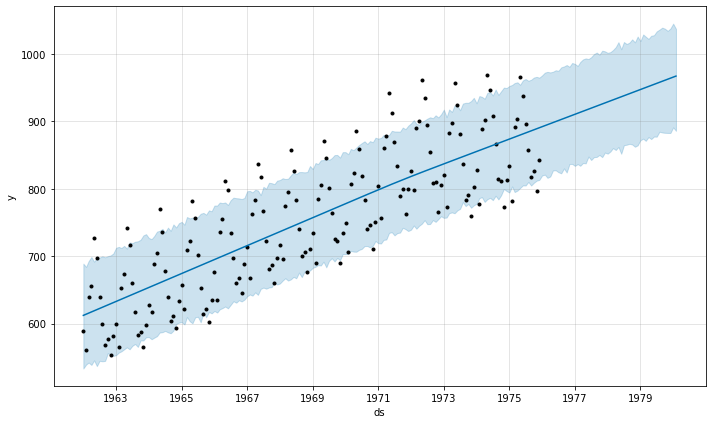

In [119]:
model = Prophet(
    seasonality_mode="multiplicative",
    weekly_seasonality=False, 
    daily_seasonality=False,
    yearly_seasonality=False,
)
model.fit(data)

future = model.make_future_dataframe(periods=50, freq = "MS")

forecast = model.predict(future)
fig1 = model.plot(forecast)

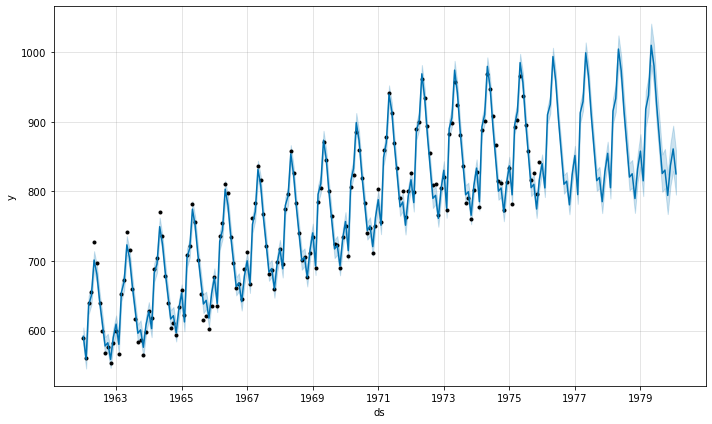

In [120]:
model = Prophet(
    seasonality_mode="multiplicative",
    weekly_seasonality=False, 
    daily_seasonality=False,
    yearly_seasonality=True,
)
model.fit(data)

future = model.make_future_dataframe(periods=50, freq = "MS")

forecast = model.predict(future)
fig1 = model.plot(forecast)

In [121]:
model.params

{'k': array([[0.28227536]]),
 'm': array([[0.62776825]]),
 'delta': array([[ 7.97204008e-08,  1.48184597e-08,  1.32302987e-06,
          3.83839733e-02,  2.78555547e-07,  6.64162043e-03,
          6.19103086e-07,  5.74852751e-02,  5.02472411e-07,
         -1.30146841e-08, -4.30865452e-02, -8.65727764e-02,
         -4.47409114e-09,  1.00646632e-08, -6.11356718e-10,
          3.34305006e-07,  2.90331101e-02,  1.49900911e-01,
          9.92559691e-02, -9.31102649e-09, -2.47456572e-02,
         -2.40506167e-01, -1.91829073e-01, -3.27255467e-08,
          2.20709892e-03]]),
 'sigma_obs': array([[0.01043134]]),
 'beta': array([[ 0.086698  , -0.05016493, -0.03859184,  0.00885103, -0.00012725,
          0.03648745,  0.00600836,  0.0212766 ,  0.00662173,  0.02012926,
          0.03671684,  0.00723945,  0.03175446, -0.01062121,  0.01793587,
         -0.01873935,  0.00603583, -0.02693078, -0.01244711, -0.01492973]]),
 'trend': array([[0.62776825, 0.62949012, 0.63104536, 0.63276722, 0.63443355,
  

# Explorando features do Prophet

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/facebook/prophet/master/examples/example_wp_log_peyton_manning.csv")

<AxesSubplot:>

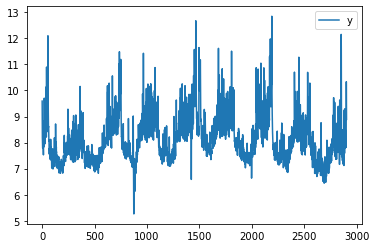

In [6]:
df.plot()

In [7]:
model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [11]:
future = model.make_future_dataframe(periods=1000)

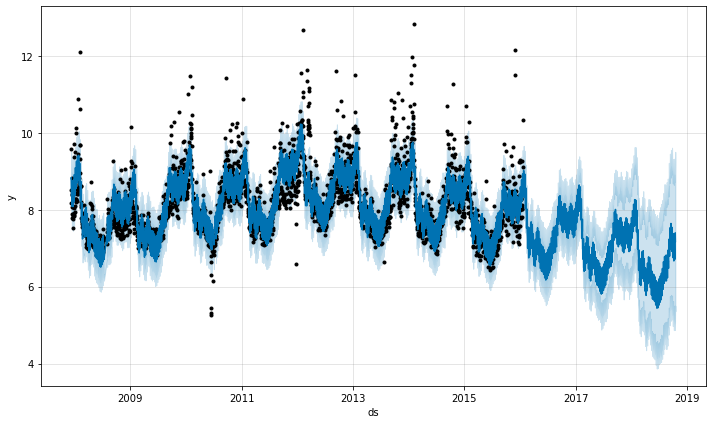

In [12]:
forecast = model.predict(future)
fig1 = model.plot(forecast)

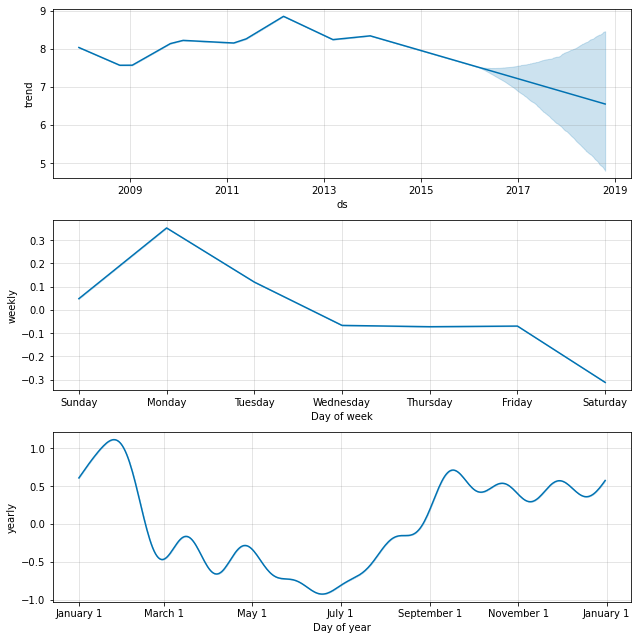

In [14]:
fig2 = model.plot_components(forecast)

# crescimento exponencial

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


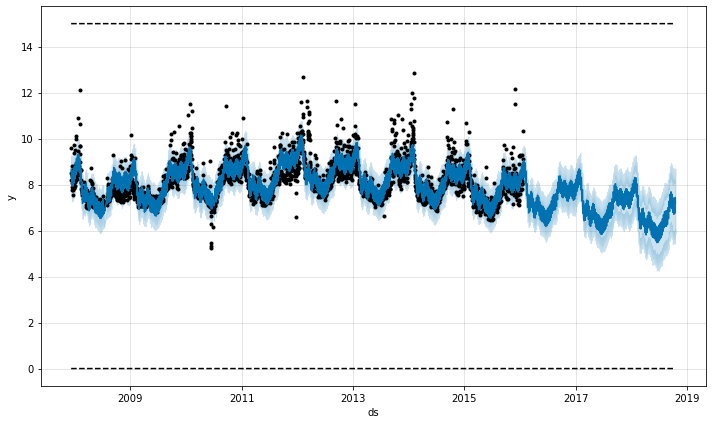

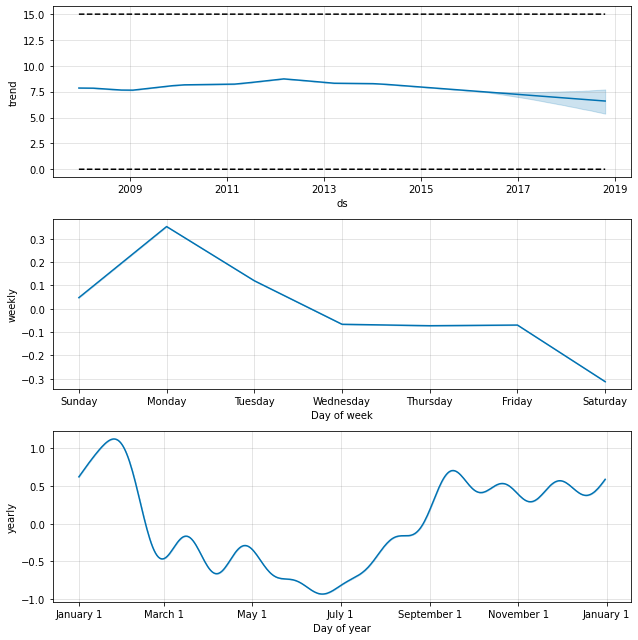

In [17]:
model = Prophet(growth='logistic',changepoint_prior_scale = 0.1, seasonality_prior_scale = 1.0)
df['cap'] = 15
df['floor'] = 0

model.fit(df)
future = model.make_future_dataframe(periods=1000)
future['cap'] = 15
future['floor'] = 0
forecast = model.predict(future)
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)

### Esse crossvalidation evita overfitting, prevendo sempre uma parte dos valores fora da curva

In [19]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon='365 days', parallel="processes")

INFO:fbprophet:Making 11 forecasts with cutoffs between 2010-02-15 00:00:00 and 2015-01-20 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fce2cf1ea90>


In [20]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2010-02-16,8.931850,8.456637,9.399509,8.242493,2010-02-15
1,2010-02-17,8.697758,8.150020,9.220473,8.008033,2010-02-15
2,2010-02-18,8.580732,8.069204,9.092688,8.045268,2010-02-15
3,2010-02-19,8.502135,8.004120,9.007834,7.928766,2010-02-15
4,2010-02-20,8.243273,7.749750,8.721074,7.745003,2010-02-15
...,...,...,...,...,...,...
3983,2016-01-16,8.657677,7.967008,9.311869,7.817223,2015-01-20
3984,2016-01-17,9.052399,8.378009,9.779463,9.273878,2015-01-20
3985,2016-01-18,9.359300,8.640256,10.056098,10.333775,2015-01-20
3986,2016-01-19,9.143022,8.455435,9.890675,9.125871,2015-01-20


O método performance_metrics pode ser usado para calcular algumas estatísticas úteis do desempenho da previsão (yhat, yhat_lower e yhat_upper em comparação com y), como uma função da distância do corte (quão longe no futuro estava a previsão). As estatísticas calculadas são erro quadrático médio (MSE), raiz do erro quadrático médio (RMSE), erro absoluto médio (MAE), erro percentual absoluto médio (MAPE), erro percentual absoluto mediano (MDAPE) e cobertura das estimativas yhat_lower e yhat_upper. Eles são calculados em uma janela contínua das previsões em df_cv após a classificação por horizonte (ds menos corte).

In [21]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,0.494352,0.703101,0.501896,0.058041,0.049451,0.675423
1,38 days,0.499570,0.706803,0.506495,0.058574,0.049179,0.674052
2,39 days,0.521320,0.722025,0.512336,0.059148,0.049179,0.673824
3,40 days,0.528706,0.727122,0.514945,0.059423,0.048869,0.681361
4,41 days,0.536383,0.732382,0.515884,0.059492,0.049050,0.683874


# hyperparameter tunning

In [22]:
import datetime

In [24]:
import itertools
import numpy as np
import pandas as pd

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

cutoffs = pd.to_datetime(['2013-02-15', '2013-08-15', '2014-02-15'])

# Generate all combinations of parameters

all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here
mapes = [] # Store the MAPEs for each params here
# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df)  # Fit model with given params
    df_cv = cross_validation(m, cutoffs=cutoffs, horizon='30 days',  parallel="processes")
    df_p = performance_metrics(df_cv)
    rmses.append(df_p['rmse'].values[0])
    mapes.append(df_p['mape'].values[0])
# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
tuning_results['mape'] = mapes
print(tuning_results)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fce45fd0cd0>
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fce4830d350>
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fce46fce7d0>
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fce482e1550>
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Applying in par

    changepoint_prior_scale  seasonality_prior_scale      rmse      mape
0                     0.001                     0.01  0.848809  0.104460
1                     0.001                     0.10  0.833798  0.102423
2                     0.001                     1.00  0.844417  0.103781
3                     0.001                    10.00  0.854999  0.105103
4                     0.010                     0.01  0.554137  0.060441
5                     0.010                     0.10  0.574201  0.062357
6                     0.010                     1.00  0.577669  0.062750
7                     0.010                    10.00  0.574468  0.062463
8                     0.100                     0.01  0.510214  0.052922
9                     0.100                     0.10  0.513153  0.052877
10                    0.100                     1.00  0.511058  0.052423
11                    0.100                    10.00  0.513130  0.052898
12                    0.500                     0.0

In [25]:
best_params = all_params[np.argmin(rmses)]
print(best_params)

{'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 1.0}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


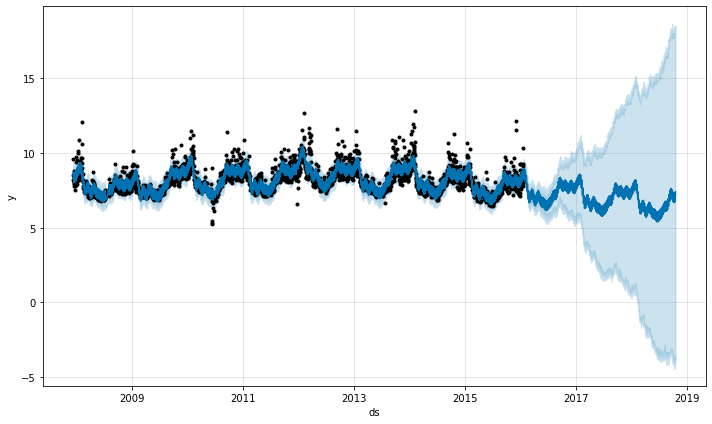

In [26]:
model = Prophet(**best_params)
model.fit(df)

future = model.make_future_dataframe(periods=1000)

forecast = model.predict(future)
fig1 = model.plot(forecast)

# Paralelizando prophet

In [25]:
import numpy as np
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
from fbprophet import Prophet
from dask.distributed import LocalCluster, Client

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

In [11]:
def random_walk_generator(n):
    steps = np.random.standard_normal(n)
    steps[0] = 0
    return np.cumsum(steps)

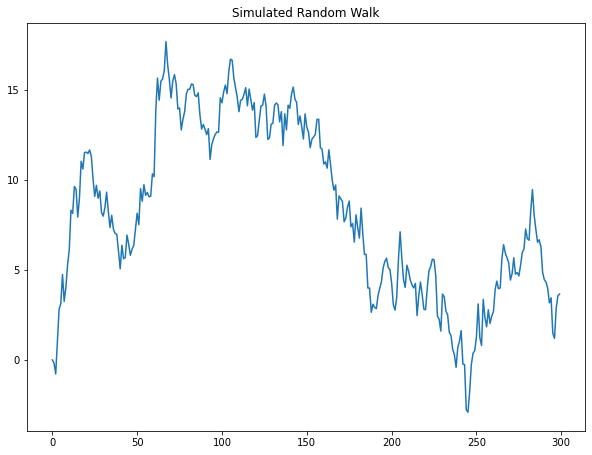

In [12]:
plt.figure(figsize=[10, 7.5]); # Set dimensions for figure
plt.plot(random_walk_generator(300))
plt.title("Simulated Random Walk")
plt.show()

In [13]:
times = pd.date_range('2012-10-01', periods=100, freq='1D')

In [14]:
df = pd.DataFrame(columns = {"ds", "y", "dimension"})
for column in range(30):
    aux_df = pd.DataFrame({"ds": times, "y": random_walk_generator(100), "dimension": column})
    df = df.append(aux_df)

In [29]:
def prophet_forecast(df):
    model = Prophet(changepoint_prior_scale=0.5)
    model.fit(df)
    future = model.make_future_dataframe(periods=10)
    forecast = model.predict(future)
    result = forecast[["ds", 'yhat', "yhat_lower", "yhat_upper"]]
    return result

In [40]:
ddf = dd.from_pandas(df, npartitions = 30)
meta = {"ds":"datetime64[ns]", 
        "yhat": "float64", 
        "yhat_lower": "float64", 
        "yhat_upper": "float64"}
grouped = ddf.groupby("dimension").apply(prophet_forecast, meta = meta)

In [41]:
ClusterWorkers=8
ThreadPerWorker=1
cluster = LocalCluster(n_workers=ClusterWorkers, threads_per_worker=ThreadPerWorker, memory_limit='2GB')
client = Client(cluster)
client

/Users/dimassoares/opt/anaconda3/envs/mentorama/lib/python3.7/site-packages/distributed/node.py:155: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 56854 instead
  http_address["port"], self.http_server.port


Client Scheduler: tcp://127.0.0.1:56855 Dashboard: http://127.0.0.1:56854/status,Cluster Workers: 8 Cores: 8 Memory: 16.00 GB


In [38]:
%%time
df.groupby("dimension").apply(prophet_forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

CPU times: user 48 s, sys: 2.8 s, total: 50.8 s
Wall time: 48.8 s


ds       yhat  yhat_lower  yhat_upper
dimension                                                  
0         0   2012-10-01  -1.905609   -3.075081   -0.786312
          1   2012-10-02  -2.167595   -3.318690   -1.058773
          2   2012-10-03  -1.771673   -2.876511   -0.601090
          3   2012-10-04  -1.048262   -2.216711    0.079584
          4   2012-10-05  -0.694348   -1.853364    0.405585
...                  ...        ...         ...         ...
29        105 2013-01-14  13.683536   12.261627   15.013143
          106 2013-01-15  13.923408   12.490293   15.323043
          107 2013-01-16  14.378391   12.880096   15.796921
          108 2013-01-17  14.557648   13.063264   16.054961
          109 2013-01-18  14.968964   13.261220   16.592913

[3300 rows x 4 columns]

In [42]:
%%time 
grouped.compute(num_workers = ClusterWorkers)

CPU times: user 6.76 s, sys: 987 ms, total: 7.75 s
Wall time: 24.9 s


ds      yhat  yhat_lower  yhat_upper
dimension                                                 
21        0   2012-10-01  0.825509   -0.560870    2.282314
          1   2012-10-02  1.335899   -0.030992    2.666228
          2   2012-10-03  1.631629    0.132184    2.973245
          3   2012-10-04  2.126372    0.663251    3.507235
          4   2012-10-05  2.720211    1.318507    4.140748
...                  ...       ...         ...         ...
6         105 2013-01-14  5.903035    4.412625    7.589547
          106 2013-01-15  5.552111    4.124412    7.254816
          107 2013-01-16  5.452860    3.916678    7.100839
          108 2013-01-17  5.636743    4.057916    7.220730
          109 2013-01-18  5.792535    4.163951    7.449046

[3300 rows x 4 columns]

# Introdução a RNN com Tensorflow

In [14]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.layers import LSTM
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow.keras import layers

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/monthly-milk-production-pounds.csv")

In [3]:
data = data.rename(columns = {"Monthly milk production (pounds per cow)": "milk"})

In [4]:
data.head(6)

,Month,milk
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727
5,1962-06,697


Vamos separar os dados por exemplo, da seguinte forma: 

[589, 561, 640] [656]


[561, 640, 656] [727]


[640, 656, 727] [697]

In [5]:
#função muito útil! não lembro aonde encontrei. fica ai o crédito ao possível autor
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

### Vamos testar com n_steps = 50, 15, 5 e 3

In [6]:
n_steps = 15
X, y = split_sequence(list(data["milk"]), n_steps)

In [15]:
# define model
n_features = 1
model = Sequential()
model.add(layers.SimpleRNN(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [16]:
X.shape

(153, 15)

In [17]:
X = X.reshape((X.shape[0], X.shape[1], n_features))

X_train = X[1:100,:,:]
X_test = X[101:X.shape[0],:,:]

y_train = y[1:100]
y_test  = y[101:X.shape[0]]

In [18]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(153, 15, 1)
(99, 15, 1)
(52, 15, 1)
(99,)
(52,)


In [19]:
model.fit(X_train, y_train, epochs=500, verbose=1)

Epoch 1/500
4/4 [==============================] - 0s 3ms/step - loss: 350112.5312
Epoch 2/500
4/4 [==============================] - 0s 3ms/step - loss: 264297.9688
Epoch 3/500
4/4 [==============================] - 0s 3ms/step - loss: 195314.3281
Epoch 4/500
4/4 [==============================] - 0s 3ms/step - loss: 132788.2031
Epoch 5/500
4/4 [==============================] - 0s 3ms/step - loss: 77207.9062
Epoch 6/500
4/4 [==============================] - 0s 3ms/step - loss: 29984.6992
Epoch 7/500
4/4 [==============================] - 0s 3ms/step - loss: 5530.5869
Epoch 8/500
4/4 [==============================] - 0s 4ms/step - loss: 12176.6123
Epoch 9/500
4/4 [==============================] - 0s 3ms/step - loss: 11174.3477
Epoch 10/500
4/4 [==============================] - 0s 3ms/step - loss: 5256.3584
Epoch 11/500
4/4 [==============================] - 0s 3ms/step - loss: 3848.4373
Epoch 12/500
4/4 [==============================] - 0s 3ms/step - loss: 4392.5083
Epoch 13/500


4/4 [==============================] - 0s 3ms/step - loss: 561.3197
Epoch 200/500
4/4 [==============================] - 0s 3ms/step - loss: 642.9894
Epoch 201/500
4/4 [==============================] - 0s 3ms/step - loss: 590.5367
Epoch 202/500
4/4 [==============================] - 0s 3ms/step - loss: 987.1156
Epoch 203/500
4/4 [==============================] - 0s 3ms/step - loss: 740.5411
Epoch 204/500
4/4 [==============================] - 0s 3ms/step - loss: 1101.5664
Epoch 205/500
4/4 [==============================] - 0s 3ms/step - loss: 592.0489
Epoch 206/500
4/4 [==============================] - 0s 3ms/step - loss: 574.4604
Epoch 207/500
4/4 [==============================] - 0s 3ms/step - loss: 544.8051
Epoch 208/500
4/4 [==============================] - 0s 3ms/step - loss: 396.0031
Epoch 209/500
4/4 [==============================] - 0s 3ms/step - loss: 543.2737
Epoch 210/500
4/4 [==============================] - 0s 3ms/step - loss: 893.1409
Epoch 211/500
4/4 [==========

4/4 [==============================] - 0s 3ms/step - loss: 221.8349
Epoch 300/500
4/4 [==============================] - ETA: 0s - loss: 313.555 - 0s 3ms/step - loss: 259.2744
Epoch 301/500
4/4 [==============================] - 0s 3ms/step - loss: 244.7562
Epoch 302/500
4/4 [==============================] - 0s 3ms/step - loss: 221.3600
Epoch 303/500
4/4 [==============================] - 0s 3ms/step - loss: 175.2099
Epoch 304/500
4/4 [==============================] - 0s 3ms/step - loss: 193.8697
Epoch 305/500
4/4 [==============================] - 0s 3ms/step - loss: 195.7585
Epoch 306/500
4/4 [==============================] - 0s 3ms/step - loss: 170.4602
Epoch 307/500
4/4 [==============================] - 0s 3ms/step - loss: 210.0545
Epoch 308/500
4/4 [==============================] - 0s 4ms/step - loss: 176.3729
Epoch 309/500
4/4 [==============================] - 0s 4ms/step - loss: 195.1026
Epoch 310/500
4/4 [==============================] - 0s 3ms/step - loss: 200.2103
Epoc

4/4 [==============================] - 0s 2ms/step - loss: 98.7857
Epoch 499/500
4/4 [==============================] - 0s 3ms/step - loss: 84.4660
Epoch 500/500
4/4 [==============================] - 0s 2ms/step - loss: 78.9334


In [20]:
y_pred = model.predict(X_test)

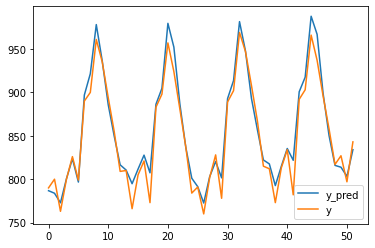

In [21]:
plt.plot(y_pred, label ='y_pred')
plt.plot(y_test, label ='y')
plt.legend()

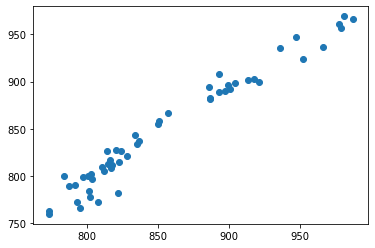

In [22]:
plt.scatter(y_pred, y_test)

In [61]:
data.tail()

,Month,milk
163,1975-08,858
164,1975-09,817
165,1975-10,827
166,1975-11,797
167,1975-12,843


In [62]:
X_new = data["milk"][-n_steps:]

In [63]:
X_new

153    812
154    773
155    813
156    834
157    782
158    892
159    903
160    966
161    937
162    896
163    858
164    817
165    827
166    797
167    843
Name: milk, dtype: int64

In [64]:
X_new = np.array(X_new).reshape(1, n_steps, 1)

In [65]:
model.predict(X_new)

array([[878.3443]], dtype=float32)

### Deep RNN

In [81]:
# define model
n_features = 1
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [82]:
model.fit(X_train, y_train, epochs=500, verbose=1)

Epoch 1/500
4/4 [==============================] - 0s 17ms/step - loss: 469762.8750
Epoch 2/500
4/4 [==============================] - 0s 16ms/step - loss: 218806.7812
Epoch 3/500
4/4 [==============================] - 0s 14ms/step - loss: 75093.4922
Epoch 4/500
4/4 [==============================] - 0s 14ms/step - loss: 70964.2500
Epoch 5/500
4/4 [==============================] - 0s 14ms/step - loss: 94918.5547
Epoch 6/500
4/4 [==============================] - 0s 13ms/step - loss: 44183.7109
Epoch 7/500
4/4 [==============================] - 0s 13ms/step - loss: 41167.3164
Epoch 8/500
4/4 [==============================] - 0s 12ms/step - loss: 16987.6133
Epoch 9/500
4/4 [==============================] - 0s 13ms/step - loss: 2180.2966
Epoch 10/500
4/4 [==============================] - 0s 14ms/step - loss: 10065.9619
Epoch 11/500
4/4 [==============================] - 0s 13ms/step - loss: 9315.3828
Epoch 12/500
4/4 [==============================] - 0s 13ms/step - loss: 4761.7139
Ep

4/4 [==============================] - 0s 14ms/step - loss: 209.2198
Epoch 199/500
4/4 [==============================] - 0s 14ms/step - loss: 400.7872
Epoch 200/500
4/4 [==============================] - 0s 13ms/step - loss: 225.7686
Epoch 201/500
4/4 [==============================] - 0s 14ms/step - loss: 310.7744
Epoch 202/500
4/4 [==============================] - 0s 13ms/step - loss: 232.4974
Epoch 203/500
4/4 [==============================] - 0s 14ms/step - loss: 221.6469
Epoch 204/500
4/4 [==============================] - 0s 16ms/step - loss: 220.7715
Epoch 205/500
4/4 [==============================] - 0s 15ms/step - loss: 226.7319
Epoch 206/500
4/4 [==============================] - 0s 14ms/step - loss: 242.6496
Epoch 207/500
4/4 [==============================] - 0s 14ms/step - loss: 230.0590
Epoch 208/500
4/4 [==============================] - 0s 14ms/step - loss: 289.7307
Epoch 209/500
4/4 [==============================] - 0s 13ms/step - loss: 236.8656
Epoch 210/500
4/4 

4/4 [==============================] - 0s 13ms/step - loss: 165.3997
Epoch 395/500
4/4 [==============================] - 0s 12ms/step - loss: 166.7266
Epoch 396/500
4/4 [==============================] - 0s 12ms/step - loss: 182.1758
Epoch 397/500
4/4 [==============================] - 0s 14ms/step - loss: 148.0944
Epoch 398/500
4/4 [==============================] - 0s 13ms/step - loss: 201.2020
Epoch 399/500
4/4 [==============================] - 0s 13ms/step - loss: 188.7618
Epoch 400/500
4/4 [==============================] - 0s 13ms/step - loss: 164.9458
Epoch 401/500
4/4 [==============================] - 0s 13ms/step - loss: 157.4447
Epoch 402/500
4/4 [==============================] - 0s 12ms/step - loss: 160.4488
Epoch 403/500
4/4 [==============================] - 0s 12ms/step - loss: 158.0833
Epoch 404/500
4/4 [==============================] - 0s 13ms/step - loss: 173.4690
Epoch 405/500
4/4 [==============================] - 0s 13ms/step - loss: 252.6091
Epoch 406/500
4/4 

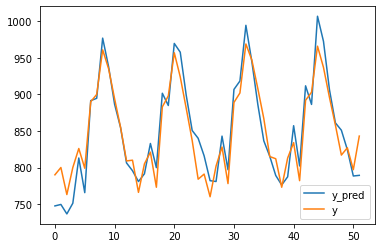

In [83]:
y_pred = model.predict(X_test)

plt.plot(y_pred, label ='y_pred')
plt.plot(y_test, label ='y')
plt.legend()

In [85]:
model.predict(X_new)

array([[857.88257]], dtype=float32)

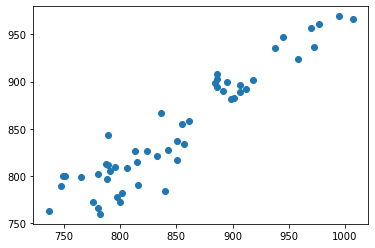

In [86]:
plt.scatter(y_pred, y_test)